# <p style="text-align: center;"> CSCI-455 | Computer Vision Systems </p>
<p style="text-align: center;"> Images as a Functions and Gaussian Filters </p>
<p style="text-align: center;">Spring 2020</p>

<div class="alert alert-block alert-info">
    1. Colored images as a functions
</div>

<img src="image.png" width="480">

### Importing required libraries

In [1]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

<div class="alert alert-block alert-info">
    2. Addition from another perspective
</div>

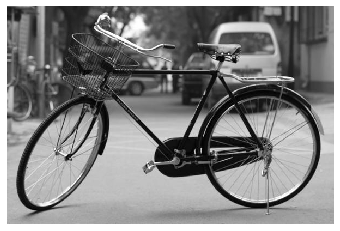

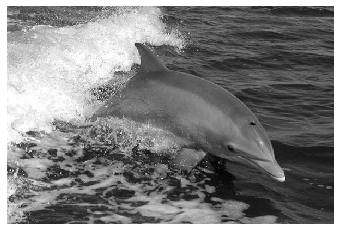

In [2]:
bicycle = plt.imread('bicycle.jpg')
dolphin = plt.imread('dolphin.jpg')

plt.imshow(bicycle, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dolphin, cmap='gray')
plt.axis('off')
plt.show()

### Addition

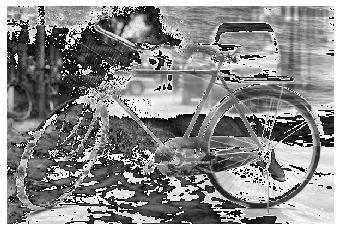

In [3]:
Sum =  dolphin + bicycle
plt.imshow(Sum, cmap='gray')
plt.axis('off')
plt.show()

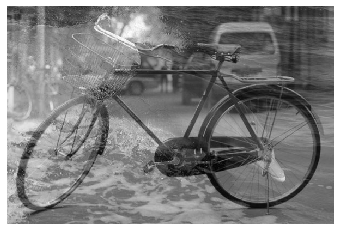

In [83]:
Sum_alt =  (dolphin/2) + (bicycle/2)
plt.imshow(Sum_alt, cmap='gray')
plt.axis('off')
plt.show()

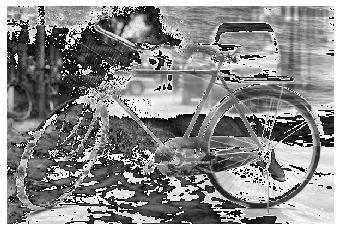

In [5]:
Avg =  (dolphin + bicycle) / 2
plt.imshow(Avg, cmap='gray')
plt.axis('off')
plt.show()

### What?!!

#### wait a second.. 

\begin{equation*}
\text{is..   } \frac{183}{(2)} + \frac{152}{(2)} \text{   is equal to..   } \frac{183 + 152}{(2)}
\end{equation*}
## ..

<div class="alert alert-block alert-info">
    3. Bliding images
</div>

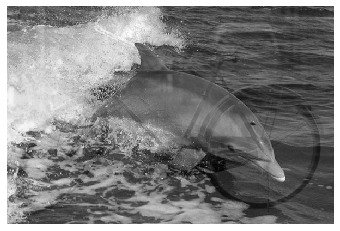

In [4]:
result =  dolphin * 0.5 + bicycle * 0.8
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

### Building a function for blinding

In [5]:
def blind(img1, img2, alpha):
    result = img1 * alpha + img2 * (1-alpha)
    return result

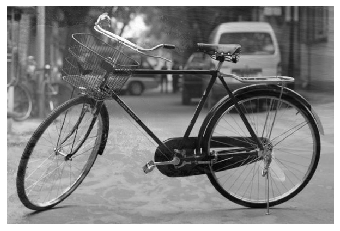

In [9]:
result = blind(bicycle,dolphin,0.8)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-info">
    4. Diffrence
</div>

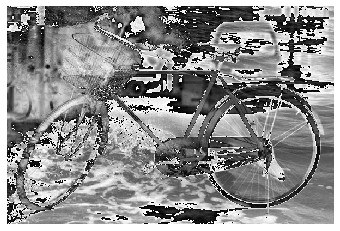

In [53]:
plt.imshow(dolphin-bicycle, cmap='gray')
plt.axis('off')
plt.show()

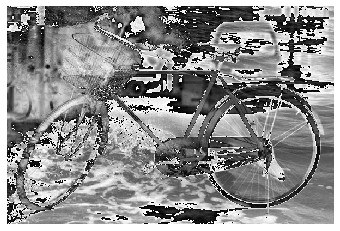

In [60]:
plt.imshow(abs(dolphin-bicycle), cmap='gray')
plt.axis('off')
plt.show()

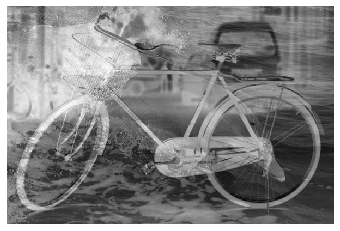

In [90]:
plt.imshow((dolphin.astype('float')-bicycle.astype('float')), cmap='gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-info">
    5. Generate Gaussian Noise
</div>

### rand() functions

In [110]:
#rand for random numbers
print(np.random.rand(5))
#randint for random integers
print(np.random.randint(5, size=10))
#randn for random gaussian
print(np.random.randn(5))

[0.67554694 0.61403949 0.6160472  0.84480451 0.49640922]
[2 3 0 1 0 3 1 0 3 0]
[ 1.32852707  0.16809302  1.07495479 -0.35379172  1.18838478]


### Creating Gaussian Noise

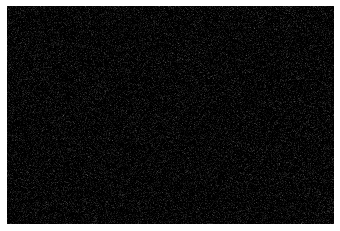

In [14]:
Sigma = 20
Gaussian = np.random.randn(400,600)*Sigma
plt.imshow(Gaussian, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### Adding Gaussian Noise to image

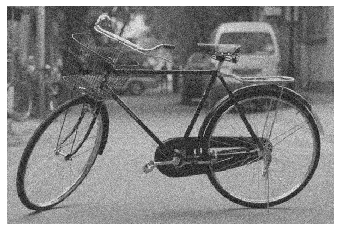

In [16]:
plt.imshow(bicycle + Gaussian, cmap='gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-info">
    6. Smoothing the images
</div>

### Creating Noise

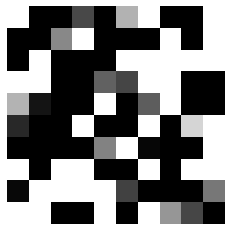

In [575]:
Sigma = 1000
Gaussian = np.random.randn(10,10)*Sigma
plt.imshow(Gaussian, cmap='gray', vmin=-255, vmax=255)
plt.axis('off')
plt.show()

### 1. Using Moving Average Filter

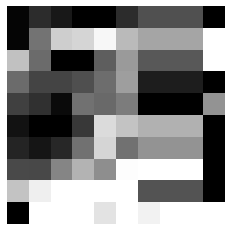

In [570]:
MAF = deepcopy(Gaussian)
for i in range(0,7,1):
    for j in range(0,7, 1):
        Img = Gaussian[i:i+3,j:j+3]
        Filter =  (1/9)*np.matrix('1 1 1; 1 1 1; 1 1 1')
        MAF[i:i+3,j:j+3] = Img * Filter
        
plt.imshow(MAF, cmap='gray', vmin=-225, vmax=255)
plt.axis('off')
plt.show()

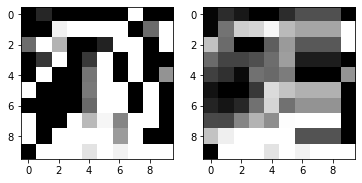

In [571]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Gaussian, cmap='gray', vmin=-225, vmax=255)
ax2.imshow(MAF, cmap='gray', vmin=-225, vmax=255)

### 2. Using Weighted Average Filter

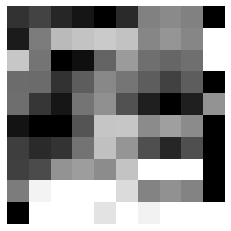

In [572]:
WAF = deepcopy(Gaussian)
for i in range(0,7,1):
    for j in range(0,7, 1):
        Img = Gaussian[i:i+3,j:j+3]
        Filter =  (1/16)* np.matrix('1 2 1; 2 4 2; 1 2 1')
        WAF[i:i+3,j:j+3] = Img * Filter
        
plt.imshow(WAF, cmap='gray', vmin=-225, vmax=255)
plt.axis('off')
plt.show()

### Comparison

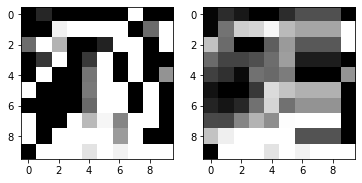

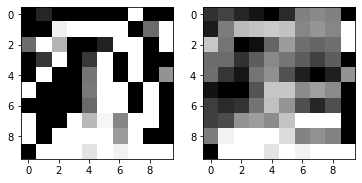

In [573]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Gaussian, cmap='gray', vmin=-225, vmax=255)
ax2.imshow(MAF, cmap='gray', vmin=-225, vmax=255)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Gaussian, cmap='gray', vmin=-225, vmax=255)
ax2.imshow(WAF, cmap='gray', vmin=-225, vmax=255)

### 3. Let's Make a Blurring Filter as Function

In [531]:
def Bluring(img, hight, width):
    Blurred_Image = deepcopy(img)
    for i in range(0,hight-3,1):
        for j in range(0,width-3, 1):
            Img = img[i:i+3,j:j+3]
            Filter = (1/16)* np.matrix('1 2 1; 2 4 2; 1 2 1')
            Blurred_Image[i:i+3,j:j+3] = Img * Filter
    return Blurred_Image

result = Bluring(dolphin,400,600)

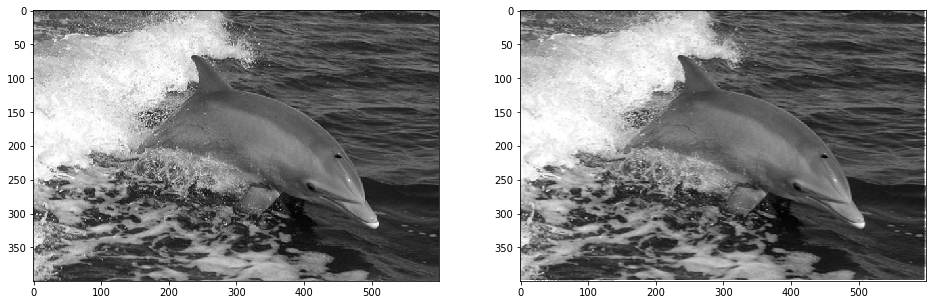

In [535]:
plt.figure(figsize=(16,15))
plt.subplot(1, 2, 1)
plt.imshow(dolphin, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray', vmin=0, vmax=63)
plt.show()